<a href="https://colab.research.google.com/github/mathiasadikpon/AI/blob/main/Weekly_Report_2_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weekly Report 2 - PCA
Contributors: Cody Bisram, Huihuang Liu, Mathias Adikpon, Oxana Firsova and Rabiul Hossain contributed to this Project.

# Python Libraries and Data

In [ ]:
# required lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
data19 = pd.read_csv('https://www2.census.gov/programs-surveys/cps/datasets/2019/supp/dec19pub.csv')
data20 = pd.read_csv('https://www2.census.gov/programs-surveys/cps/datasets/2020/supp/dec20pub.csv')

In [ ]:
data19.head()

HRHHID  HRMONTH  HRYEAR4  ...  HRFS30D8  HRFS30D9  HRFS30DE
0  581125017600866       12     2019  ...         1         0        -6
1  581125017600866       12     2019  ...         1         0        -6
2  581125017600866       12     2019  ...         1         0        -6
3  581125017600866       12     2019  ...         1         0        -6
4  809001585510960       12     2019  ...         1         0        -6

[5 rows x 510 columns]

**HRFS12M1**: Summary Food Security Status, 12-Month Recall ( **Target Variable**)
1.   Food Secure High or Marginal Food Security (1)
2.   Low Food Security (2) 
3.   Very Low Food Security (3) 

**HESC3**: In the last 12 months, did (you/you or other adults in your household) ever get emergency food from a church, a food pantry, or food bank?

**HRYEAR4**: Year of interview

**HUFINAL**: Final outcome code

**HEFAMINC**: Family Income

**HRNUMHOU**: Total number of persons living in the household

**GEREG**:  Region (1:Northeast,2: Midwest, 3:South, 4:West) 

**PRTAGE**: Person's age

**PESEX**: Sex

**PTDTRACE**: Race

**HETS8O**: The total amount spend on food last week

**HES8B**: In norder to buy just enough food to meet your needs or the needs of the household, would you need to spend more than you do now, or could you spend less?

**HETS8CO**: Out variable that represents how much MORE would need to be spent each week to buy just enough food to meet household needs

**HESP1**: In the past 12 months, since December of last year, did (you/anyone in this household) get SNAP/Supplemental Nutrition Assistance Program or food stamp benefits?

**HESH1**: The child(ren) in my/our household was not eating enough because I/we just couldn't afford enough food. Was that OFTEN, SOMETIMES, or NEVER true for your/your household in the last 12 months?

**HESSH2**: In the last 12 months, did you ever cut the size of (the child's any of the children's) meals because there wasn't enough money for food?

**HETSSHFM2**: In the last 30 days, how many days did you cut the size of (the child's/any of the children's) meals because there wasn't enough
money for food?

**HETSSHMF3**: In the last 30 days, how many days (was the child/were the children) hungry but you just couldn't afford more food?

**HESSH4**: In the last 12 months, did (the child/any ofthe children) ever skip a meal because there wasn't enough money for food?

**HESSH5**: In the last 12 months, did (the child/any of the children) ever not eat for a whole day because there wasn't enough money for
food?

**HESC3**: In the last 12 months, did (you/you or other adults in your household) ever get emergency food from a church, a food pantry, or food bank?

**HESC3A**: Is there a church, food pantry or food bank in your community where you could get emergency food if you needed it?

**HRFS12MD**: Detailed Food Security Status 12-Month Recall 

**HRFS30D1**: Summary Food Security Status, 30-Day Recall

**HRFS30D2**: Detailed Food Security Status 30-Day Recall 

**HRFS30D5**: Children's Food Security Status 30-Day Recall

**HRFS30D8**: Adult Food Security Status, 30-Day
Recall 

**HESSH1**: In the last 12 months, did (you/you or other adults in your household) ever not eat for a whole day because there wasn't enough money for food?

**HESSH3**: In the last 12 months, (was the child/were the children) ever hungry but you just couldn't afford more food?

**HESS6**: (I/We) couldn't feed (the child in (my/our) household/the children) a balanced meal, because (I/we) couldn't afford that. Was that OFTEN, SOMETIMES or NEVER true for (you/your household) in the last 12 months?

**HESH5**: 2 In the last 12 months, did you lose weight because there wasn't enough money for food?

**PRWKSTAT**: Full/Part-Time Work Status

**PEDISOUT**: Because of a physical, mental, or emotional condition, have you had difficult doing errands alone such as visiting a doctor's office, or shopping?

---



# CODE 2019 Data


In [ ]:
#data attribute we are interested in, see above for details  
# Take the columns/ attributes that are important for the implementation of food security PCA analysis
col = ['HRFS12M1','HRNUMHOU','GEREG','PTDTRACE','HES8B','HESP1','HESH1','HESSH2','HETSSHMF2','HETSSHMF3',
       'HESSH4',"HESSH5", "HESC3", "HESC3A", 'HRFS12MD', 'HRFS30D1','HRFS30D2','HRFS30D5','HRFS30D8','HESSH1' , 'HESSH3', 'HESS6', 'HESH5','PRWKSTAT','PEDISOUT','PESEX']
       #'HRYEAR4','HEFAMINC',,'HETS8O', 'HETS8OU', 'HUFINAL',,'PRTAGE','HETS8CO'

In [ ]:
#lets try to use the whole data set for PCA
# Only accept entries that are positive numbers and exclude responses that are ‘ not in universe’ or no response
df19 = data19[col]
df19 = df19[df19['HRFS12M1']>0]
#df19['HRFS12M1'].replace([1,2,3],['High Food Security', 'Low Food Security','Very Low Food Security'], inplace = True)

In [ ]:
df19 = df19[df19['HES8B']>0]
#print(df19['HES8B'].value_counts())
df19 = df19[df19['HESSH1']>0]
#print(df19['HES8B'].value_counts())
df19 = df19[df19['HESH1']>0]
#print(df19['HESH1'].value_counts())
df19 = df19[df19['HESH1']>0]
#print(df19['HESH1'].value_counts())

In [ ]:
df19.head()

HRNUMHOU  GEREG  PTDTRACE  HES8B  ...  HESH5  PRWKSTAT  PEDISOUT  PESEX
9           3      3         1      1  ...      2         1         2      2
10          3      3         1      1  ...      2        11         2      1
11          3      3         1      1  ...      2        -1        -1      2
288         2      3         2      2  ...      2         4         2      2
289         2      3         2      2  ...      2        -1        -1      2

[5 rows x 25 columns]

In [ ]:
df19.describe()

HRNUMHOU        GEREG  ...     PEDISOUT        PESEX
count  3172.000000  3172.000000  ...  3172.000000  3172.000000
mean      4.407314     2.805801  ...     0.720050     1.557062
std       1.617446     0.997375  ...     1.460011     0.496812
min       2.000000     1.000000  ...    -1.000000     1.000000
25%       3.000000     2.000000  ...    -1.000000     1.000000
50%       4.000000     3.000000  ...     2.000000     2.000000
75%       5.000000     4.000000  ...     2.000000     2.000000
max      11.000000     4.000000  ...     2.000000     2.000000

[8 rows x 25 columns]

In [ ]:
df19['HRFS12M1'].value_counts()

2    1774
3    1229
1     169
Name: HRFS12M1, dtype: int64

In [ ]:
labels = df19['HRFS12M1'].values
df19.drop('HRFS12M1',axis=1, inplace=True)

In [ ]:
#Test Cell 
labels = df19['GEREG'].values
df19.drop('GEREG',axis=1, inplace=True)

In [ ]:
#Test Cell 
labels = df19['PESEX'].values
df19.drop('PESEX',axis=1, inplace=True)

In [ ]:
#scalling data - StandardScaler helps to standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) 
scaler = StandardScaler()
scaled_X = scaler.fit_transform(df19)
scaled_X.shape

(3172, 25)

In [ ]:
#Perform PCA on the scaled df
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_X)
principal_components.shape

(3172, 3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


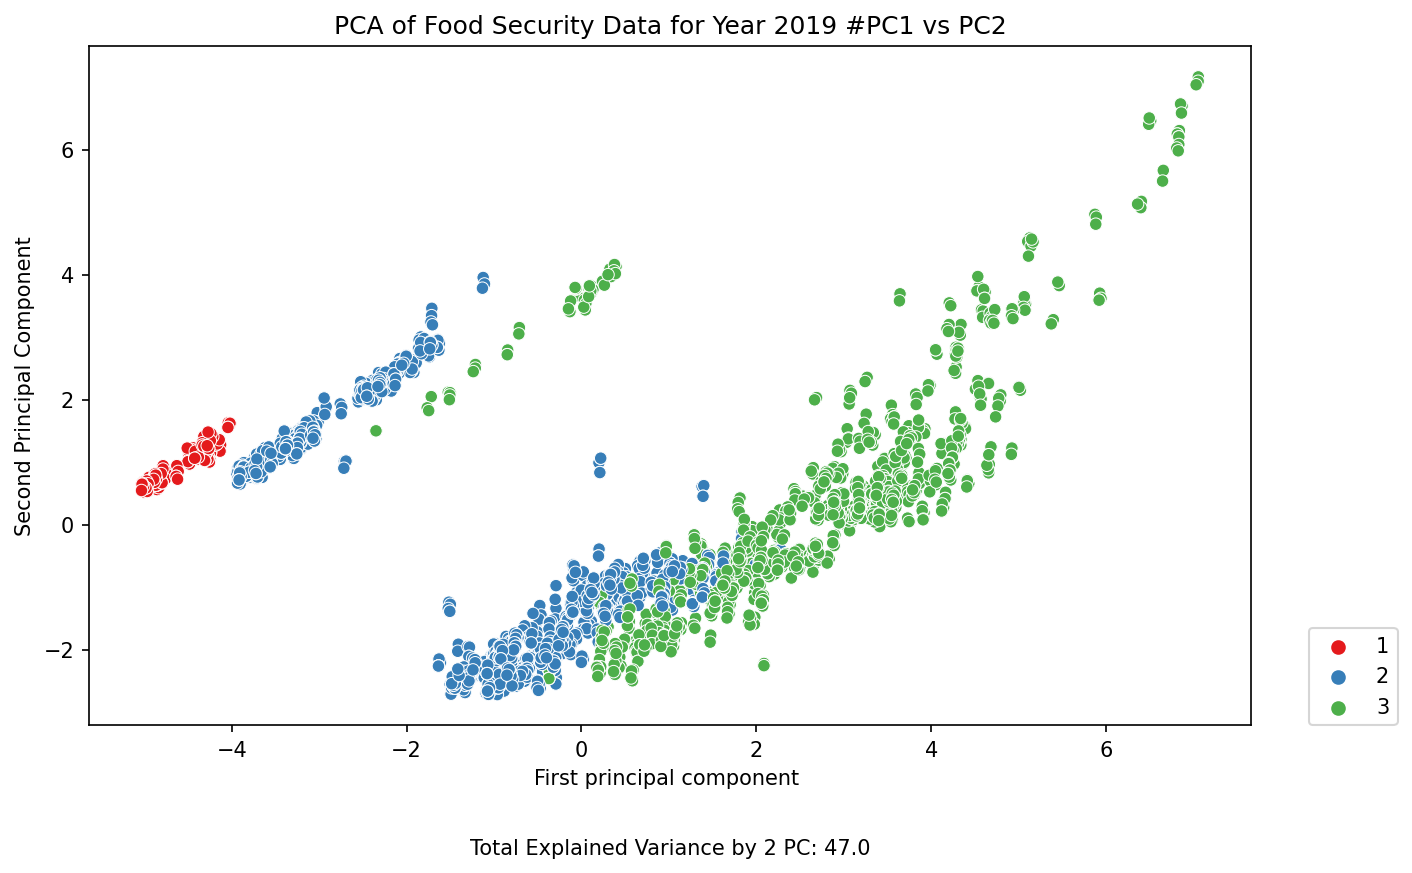

In [ ]:
#PC1 vs PC2
#### Test Cell   
plt.figure(figsize=(10,6),dpi=150)
sns.scatterplot(principal_components[:,0],principal_components[:,1],hue=labels,palette='Set1')
plt.legend(loc=(1.05,0))
plt.xlabel('First principal component \n\n\nTotal Explained Variance by 2 PC: {}'.format(np.round(np.sum(pca.explained_variance_ratio_)*100, decimals=2)))
plt.ylabel('Second Principal Component')
plt.title("PCA of Food Security Data for Year 2019 #PC1 vs PC2")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


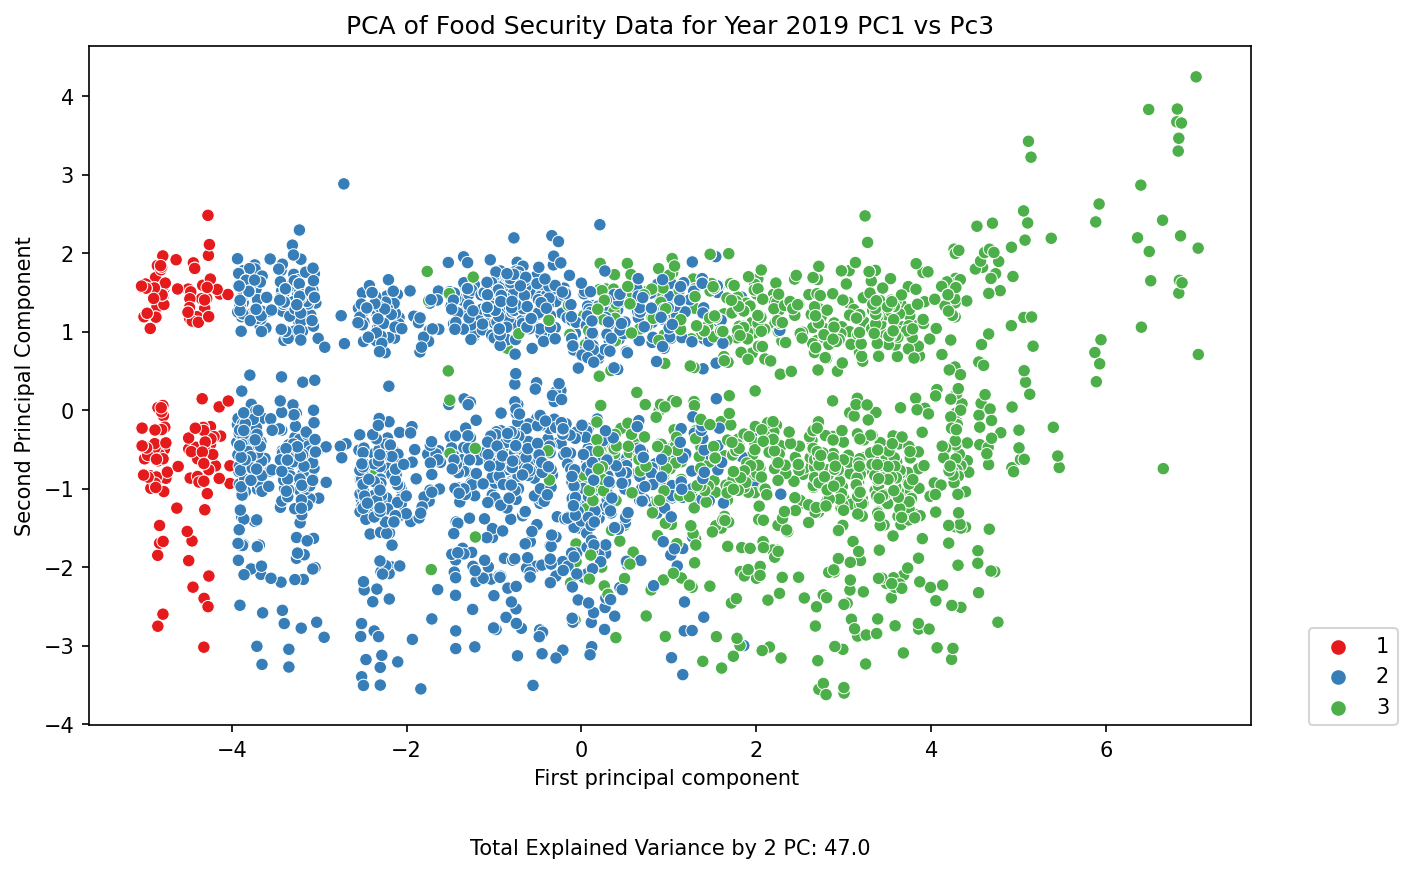

In [ ]:
#PC1 vs Pc3
#### Test Cell  -  
plt.figure(figsize=(10,6),dpi=150)
sns.scatterplot(principal_components[:,0],principal_components[:,2],hue=labels,palette='Set1')
plt.legend(loc=(1.05,0))
plt.xlabel('First principal component \n\n\nTotal Explained Variance by 2 PC: {}'.format(np.round(np.sum(pca.explained_variance_ratio_)*100, decimals=2)))
plt.ylabel('Second Principal Component')
plt.title("PCA of Food Security Data for Year 2019 PC1 vs Pc3")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


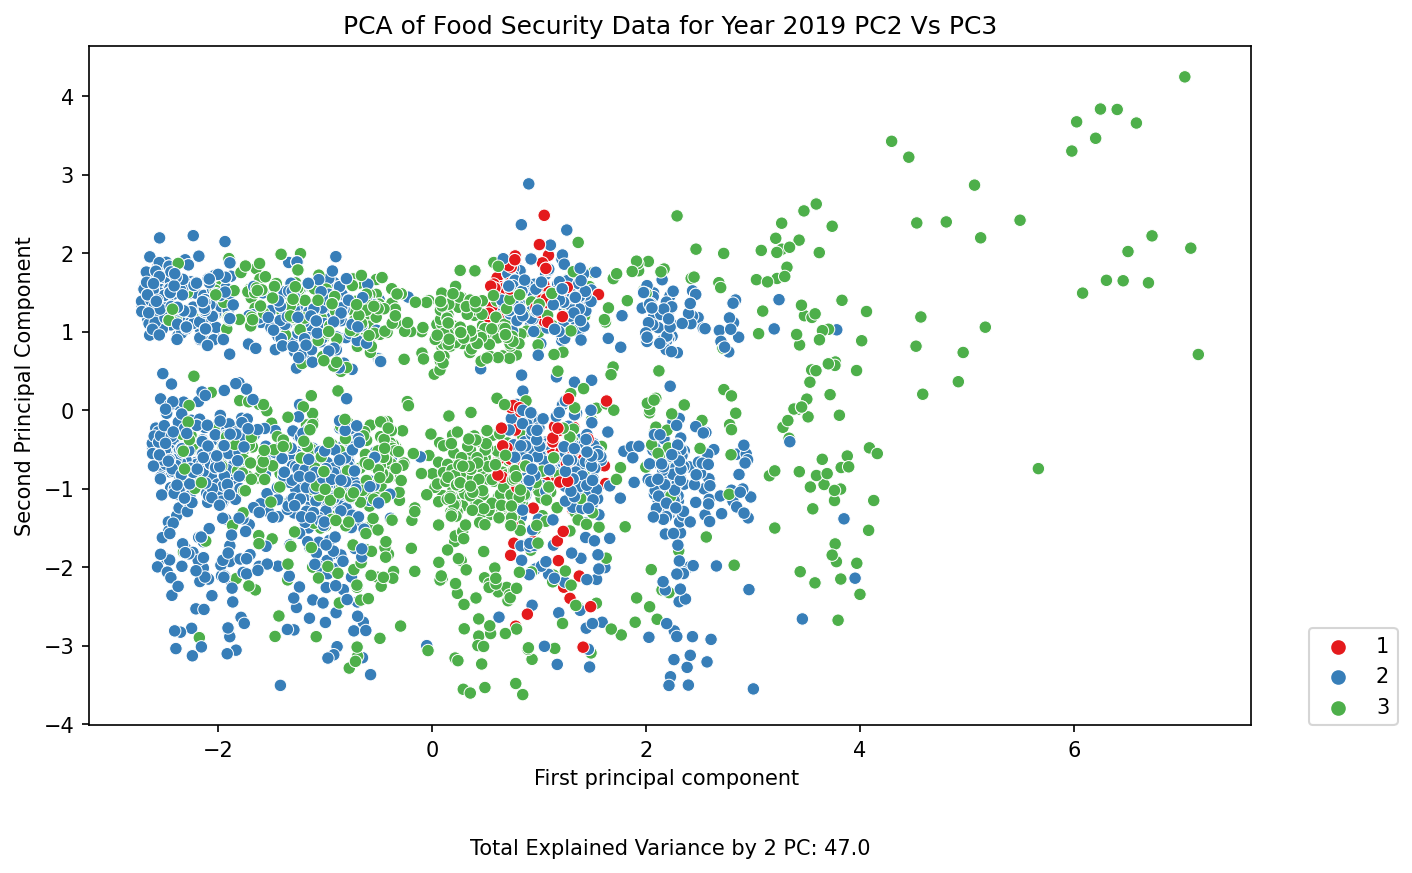

In [ ]:
#PC2 vs PC3
#### Test Cell  - 
plt.figure(figsize=(10,6),dpi=150)
sns.scatterplot(principal_components[:,1],principal_components[:,2],hue=labels,palette='Set1')
plt.legend(loc=(1.05,0))
plt.xlabel('First principal component \n\n\nTotal Explained Variance by 2 PC: {}'.format(np.round(np.sum(pca.explained_variance_ratio_)*100, decimals=2)))
plt.ylabel('Second Principal Component')
plt.title("PCA of Food Security Data for Year 2019 PC2 Vs PC3")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


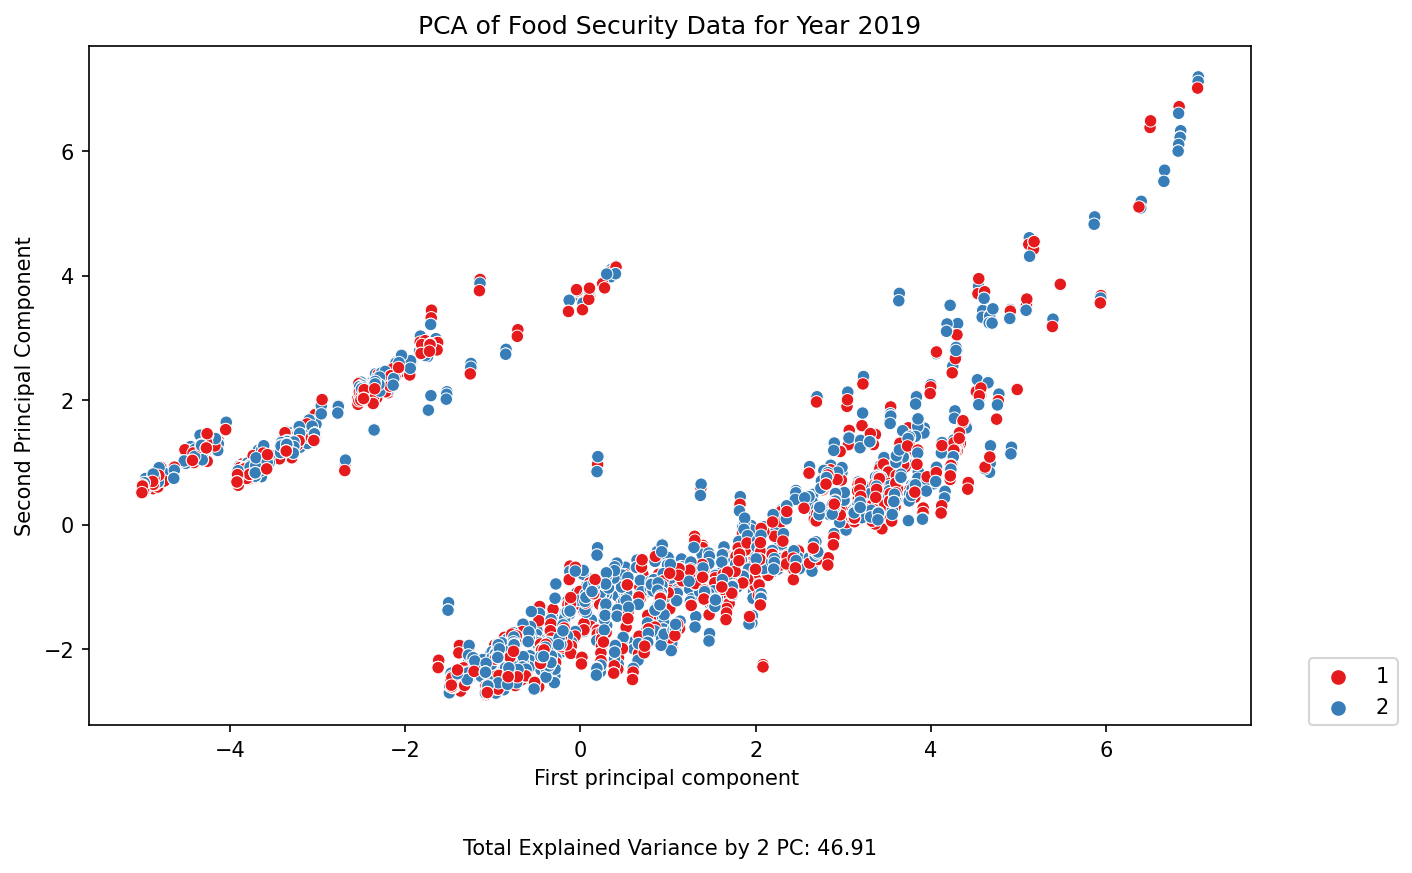

In [ ]:
#### Test Cell  - sex 
plt.figure(figsize=(10,6),dpi=150)
sns.scatterplot(principal_components[:,0],principal_components[:,1],hue=labels,palette='Set1')
plt.legend(loc=(1.05,0))
plt.xlabel('First principal component \n\n\nTotal Explained Variance by 2 PC: {}'.format(np.round(np.sum(pca.explained_variance_ratio_)*100, decimals=2)))
plt.ylabel('Second Principal Component')
plt.title("PCA of Food Security Data for Year 2019")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


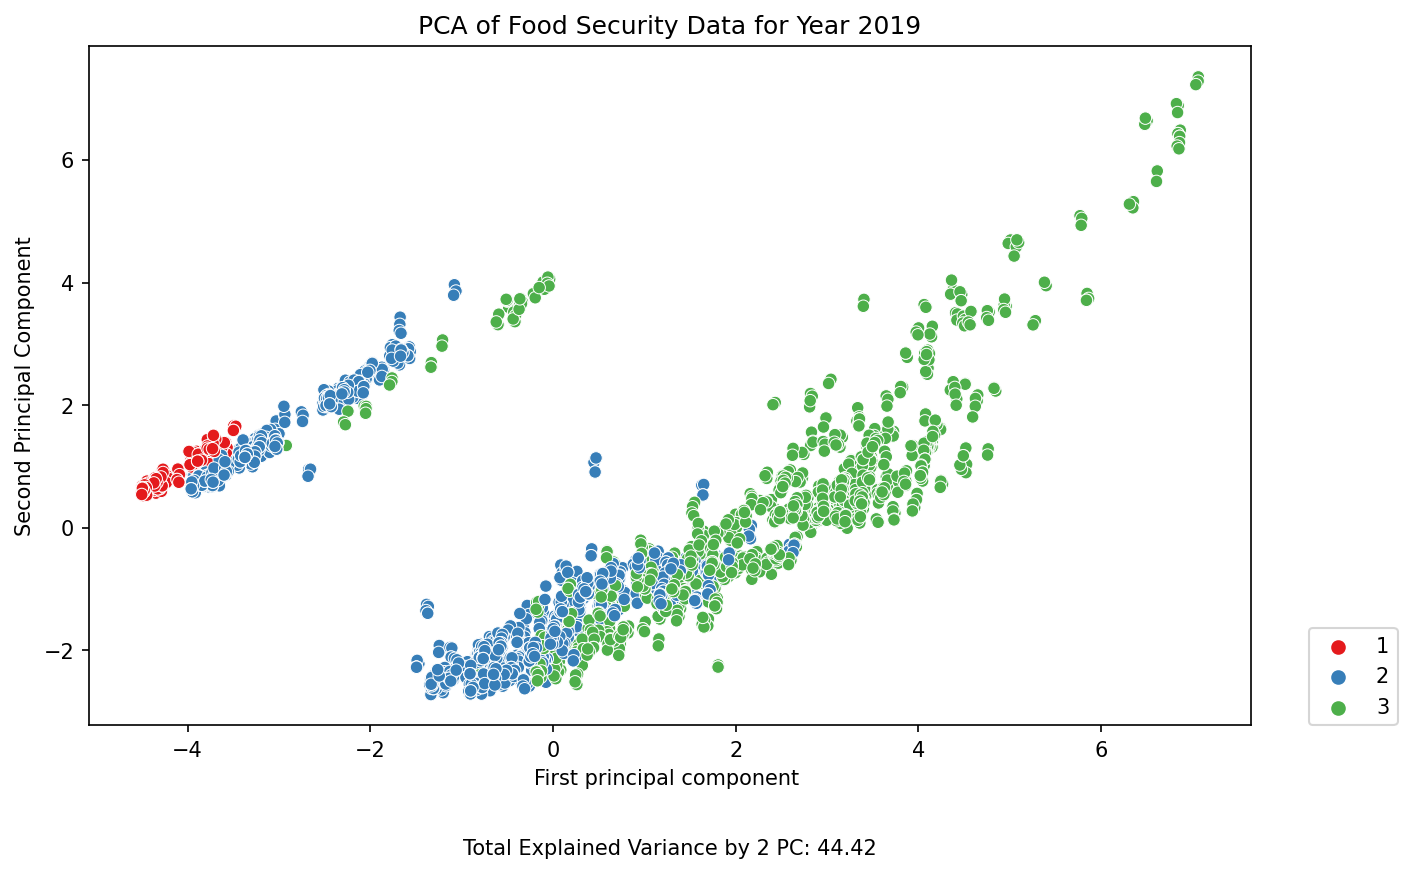

In [ ]:
#### Test Cell  food security
plt.figure(figsize=(10,6),dpi=150)
sns.scatterplot(principal_components[:,0],principal_components[:,1],hue=labels,palette='Set1')
plt.legend(loc=(1.05,0))
plt.xlabel('First principal component \n\n\nTotal Explained Variance by 2 PC: {}'.format(np.round(np.sum(pca.explained_variance_ratio_)*100, decimals=2)))
plt.ylabel('Second Principal Component')
plt.title("PCA of Food Security Data for Year 2019")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


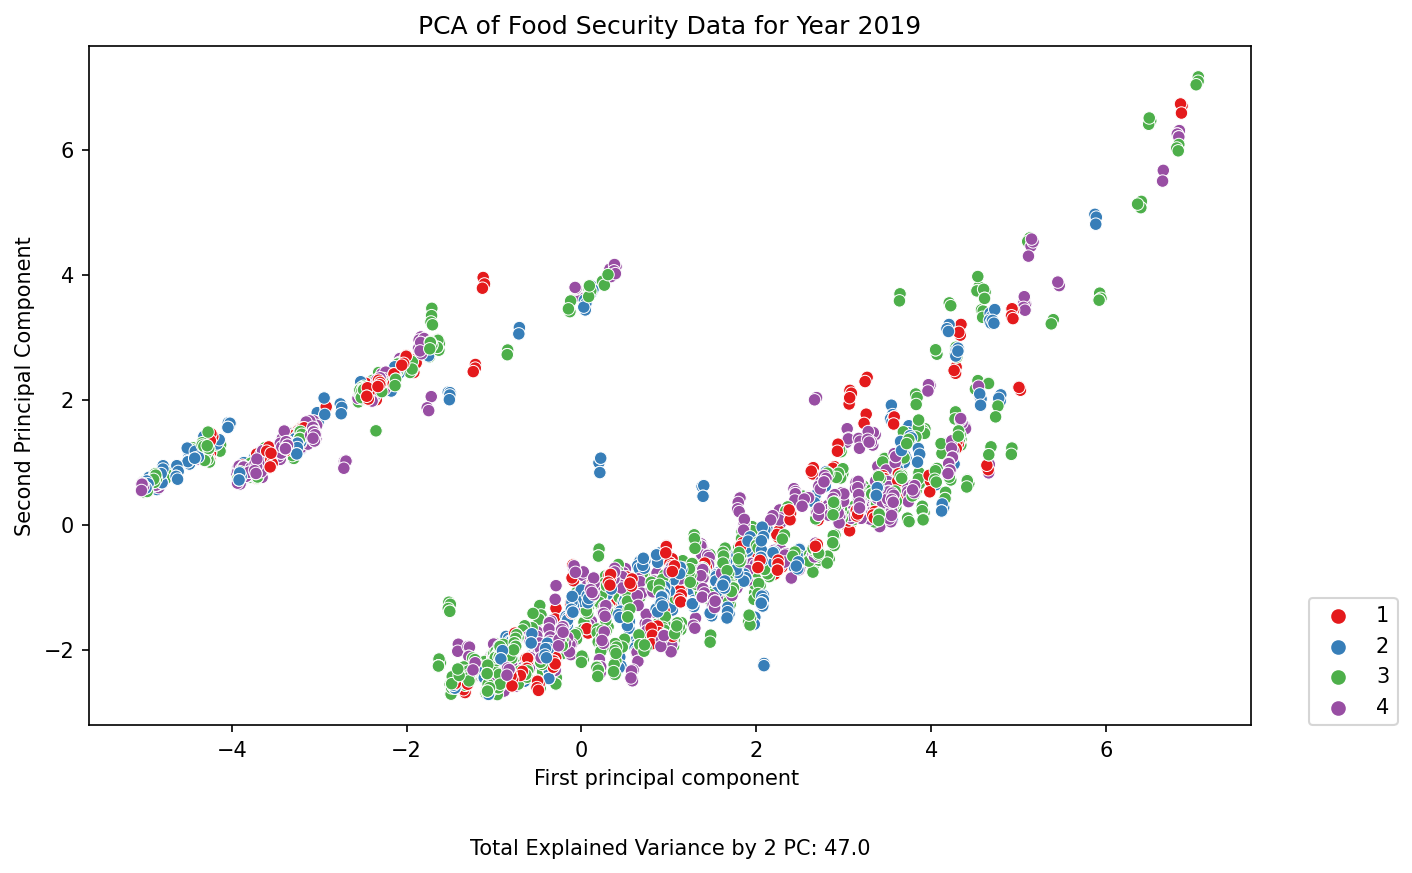

In [ ]:
#### Test Cell  Geo
plt.figure(figsize=(10,6),dpi=150)
sns.scatterplot(principal_components[:,0],principal_components[:,1],hue=labels,palette='Set1')
plt.legend(loc=(1.05,0))
plt.xlabel('First principal component \n\n\nTotal Explained Variance by 2 PC: {}'.format(np.round(np.sum(pca.explained_variance_ratio_)*100, decimals=2)))
plt.ylabel('Second Principal Component')
plt.title("PCA of Food Security Data for Year 2019")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


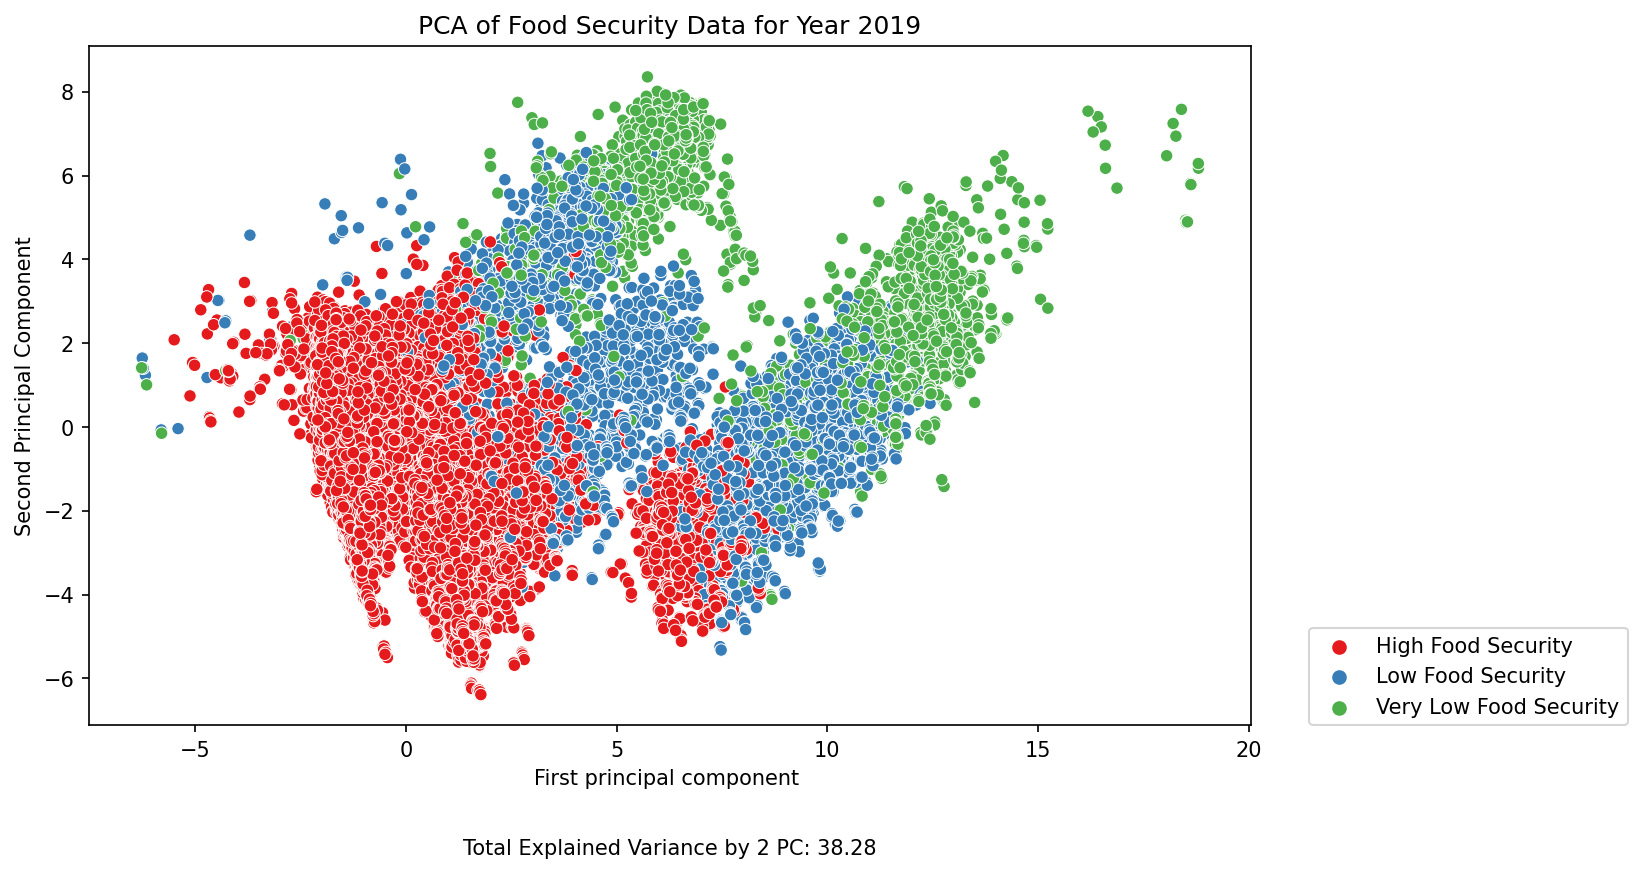

In [ ]:
plt.figure(figsize=(10,6),dpi=150)
sns.scatterplot(principal_components[:,0],principal_components[:,1],hue=labels,palette='Set1')
plt.legend(loc=(1.05,0))
plt.xlabel('First principal component \n\n\nTotal Explained Variance by 2 PC: {}'.format(np.round(np.sum(pca.explained_variance_ratio_)*100, decimals=2)))
plt.ylabel('Second Principal Component')
plt.title("PCA of Food Security Data for Year 2019")
plt.show()

#1.   Food Secure High or Marginal Food Security (1)
#2.   Low Food Security (2) 
#3.   Very Low Food Security (3) 

In [ ]:
df_comp = pd.DataFrame(pca.components_,index=['PC1','PC2'],columns=df19.columns)
df_comp

HRYEAR4   HUFINAL  HEFAMINC  ...     HESH5  PRWKSTAT  PEDISOUT
PC1 -2.896511e-20  0.006267 -0.140107  ...  0.250316 -0.036830 -0.091133
PC2  2.886377e-17 -0.013189 -0.146414  ...  0.103474  0.173381  0.286520

[2 rows x 32 columns]

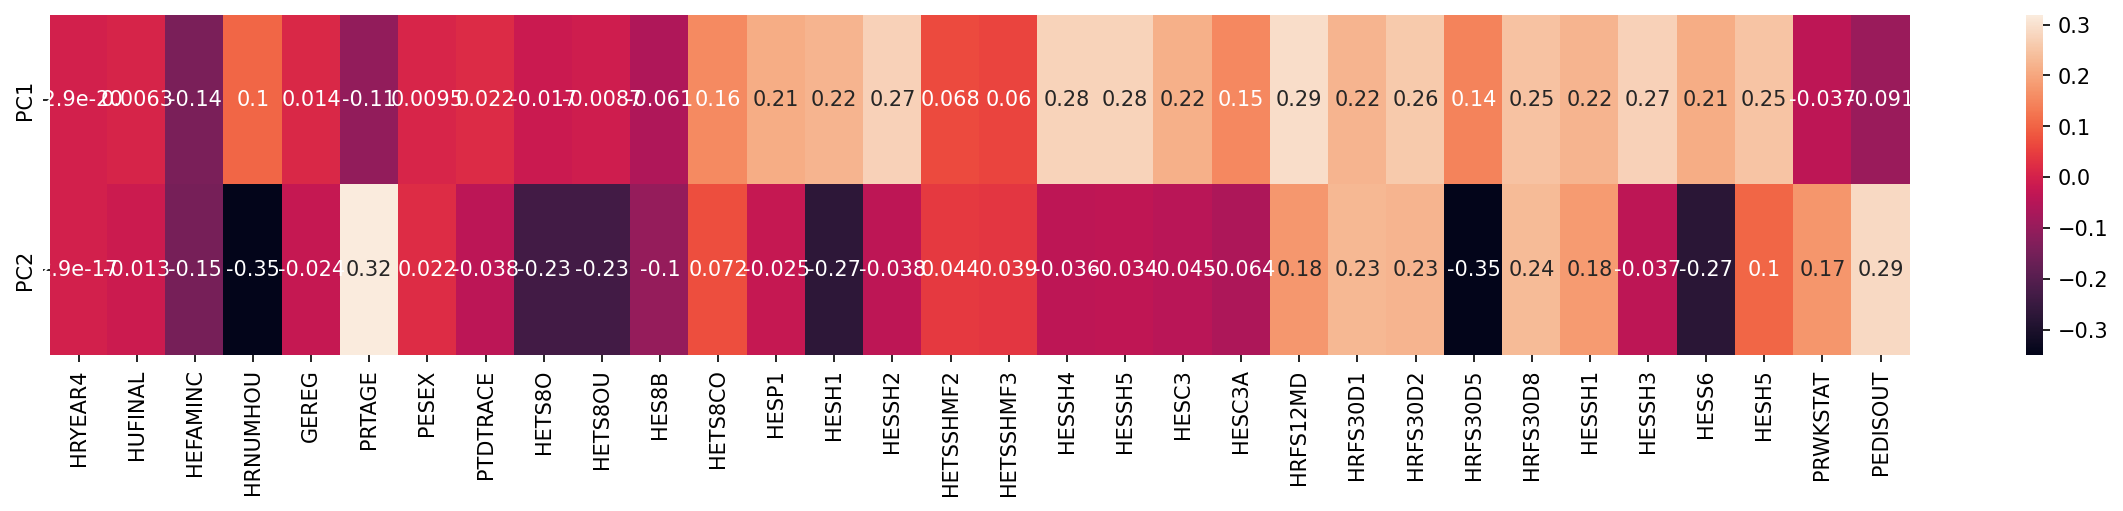

In [ ]:
plt.figure(figsize=(20,3),dpi=150)
sns.heatmap(df_comp,annot=True)

In [ ]:
explained_variance = []
for n in range(1,30):
    pca = PCA(n_components=n)
    pca.fit(scaled_X)
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

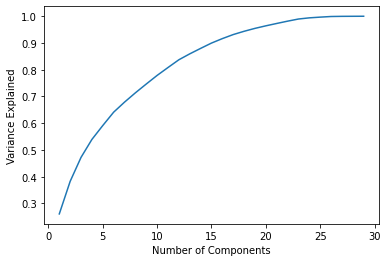

In [ ]:
Summary of Team Contribution: 
Cody: Finding datasets, reviewing published papers, research question proposal, attending all meetings and contributing to discussions
Huihuang:Finding datasets, reviewing published papers, research question proposal, attending all meetings and contributing to discussions
Mathias:Finding datasets, reviewing published papers, research question proposal, attending all meetings and contributing to discussions		
Oxana:	Finding datasets, reviewing published papers, research question proposal, attending all meetings and contributing to discussions	
Rabiul:	Finding datasets, reviewing published papers, research question proposal, attending all meetings and contributing to discussions	plt.plot(range(1,30),explained_variance)
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained");

# CODE 2020 Data

In [ ]:
#lets try to use the whole data set for PCA
df20 = data20[col]
df20 = df20[df20['HRFS12M1']>0]

In [ ]:
labels_20 = df20['HRFS12M1'].values
df20.drop('HRFS12M1',axis=1, inplace=True)

In [ ]:
#scalling data 
scaler_20 = StandardScaler()
scaled_X_20 = scaler_20.fit_transform(df20)
scaled_X_20.shape

(81604, 32)

In [ ]:
#Perform PCA on the scaled df
pca20 = PCA(n_components=2)
principal_components_20 = pca20.fit_transform(scaled_X_20)
principal_components_20.shape

(81604, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


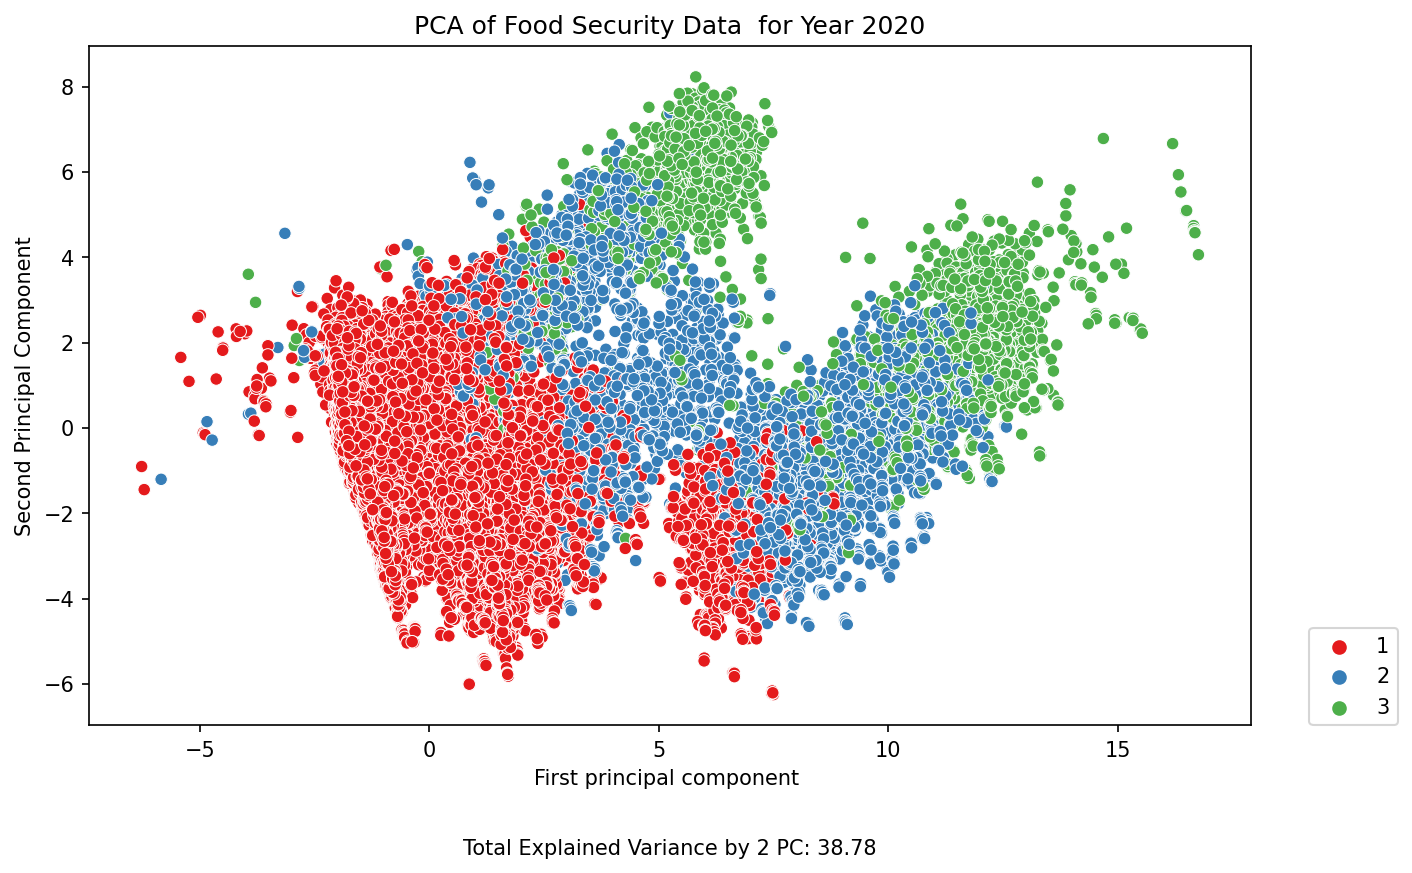

In [ ]:
plt.figure(figsize=(10,6),dpi=150)
sns.scatterplot(principal_components_20[:,0],principal_components_20[:,1],hue=labels_20,palette='Set1')
plt.legend(loc=(1.05,0))
plt.xlabel('First principal component \n\n\nTotal Explained Variance by 2 PC: {}'.format(np.round(np.sum(pca20.explained_variance_ratio_)*100, decimals=2)))
plt.ylabel('Second Principal Component')
plt.title("PCA of Food Security Data  for Year 2020")
plt.show()
#1.   Food Secure High or Marginal Food Security (1)
#2.   Low Food Security (2) 
#3.   Very Low Food Security (3) 

In [ ]:
#Explain variance for first 2 PCA
np.sum(pca20.explained_variance_ratio_)

0.3877788566253858

In [ ]:
df_comp_20 = pd.DataFrame(pca20.components_,index=['PC1','PC2'],columns=df20.columns)
df_comp_20

HRYEAR4   HUFINAL  HEFAMINC  ...     HESH5  PRWKSTAT  PEDISOUT
PC1 -8.269979e-20  0.002838 -0.136381  ...  0.250020 -0.023992 -0.086392
PC2 -3.413062e-17 -0.010506 -0.157716  ...  0.107138  0.182616  0.297142

[2 rows x 32 columns]

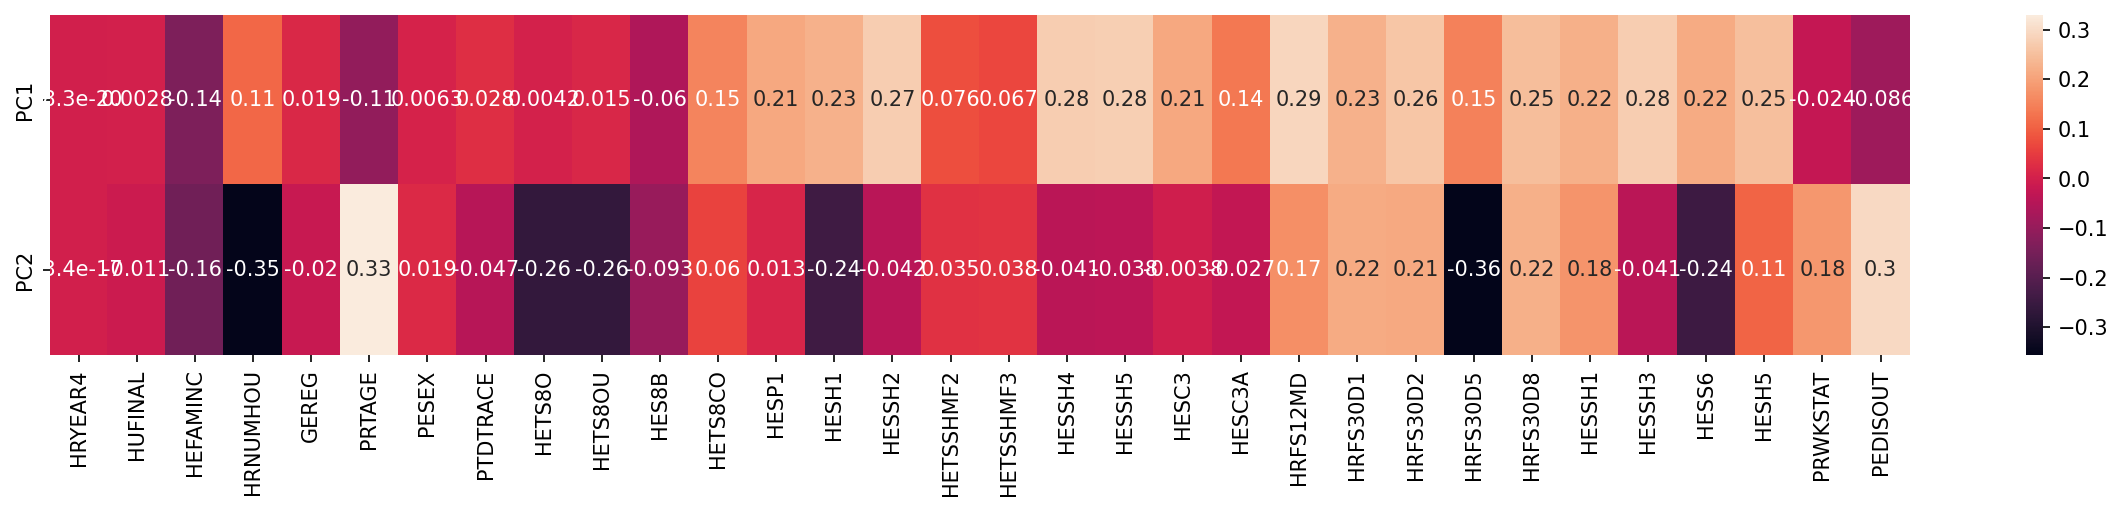

In [ ]:
plt.figure(figsize=(20,3),dpi=150)
sns.heatmap(df_comp_20,annot=True)

In [ ]:
explained_variance = []
for n in range(1,30):
    pca = PCA(n_components=n)
    pca.fit(scaled_X)
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

Text(0.5, 1.0, 'Total Variance by PCA Count')

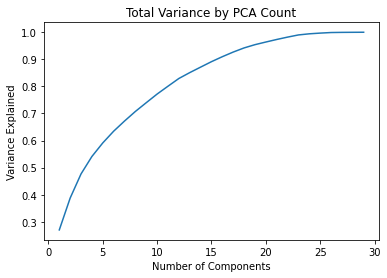

In [ ]:
plt.plot(range(1,30),explained_variance)
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained");
plt.title("Total Variance by PCA Count")

# PCA EXplained



1.   Our  data set consists of 33 dimensions. ( 32 features and 1 target variable)
2. Please note, both 2019 and 2020 data has similar observation
3. The PCA projects 32 dimensions into 2 dimensions. After such dimensionality reduction, the new components (PCA1 and PCA2) are just the two main dimensions of variation, which explains approximately 38% and 38.7% of total variance for 2019 and 2020 dataset, respectively
4. Based on the “Total Variance by PCA Count” visualization above, the number of dimensions can be reduced from 32 to  16 while preserving 92% of its variance, which is about 50% of our data from the original dataset.  
5. Heatmap: Each square shows the correlation between the feature and the principal components. Correlation ranges from -1 to +1, -1 meaning strongly negatively correlated, +1 meaning strongly positively correlated and 0 means no linear trend. We see that for PC1, the highest correlated feature is HRFS12MD(Detailed Food Security Status 12-Month Recall), 0.29. For PC2, the highest correlated feature is HRFS30D5(Children's Food Security Status 30-Day Recall), -0.36.


# Summary of Team Contribution: 


***Summary of Team Contribution:*** 

**Contributors**: Cody Bisram, Huihuang Liu, Mathias Adikpon, Oxana Firsova and Rabiul Hossain contributed to this Project.

We had multiple zoom meetings as a team and collaborated to complete this project, as a team, we performed data cleanup and visualization creation. Each member of the group contributed toward explaining visualizations and observations. 


# Team Rating


**Cody:** 

**Huihuang:** 

**Mathias:** 	

**Oxana:**			